In [4]:
# correlation

import pandas as pd

data = pd.read_csv('C:\\Users\\co279\\mp_win.csv')
correlation = data['era'].corr(data['win_rate'])
print(correlation)

-0.6881563558293309


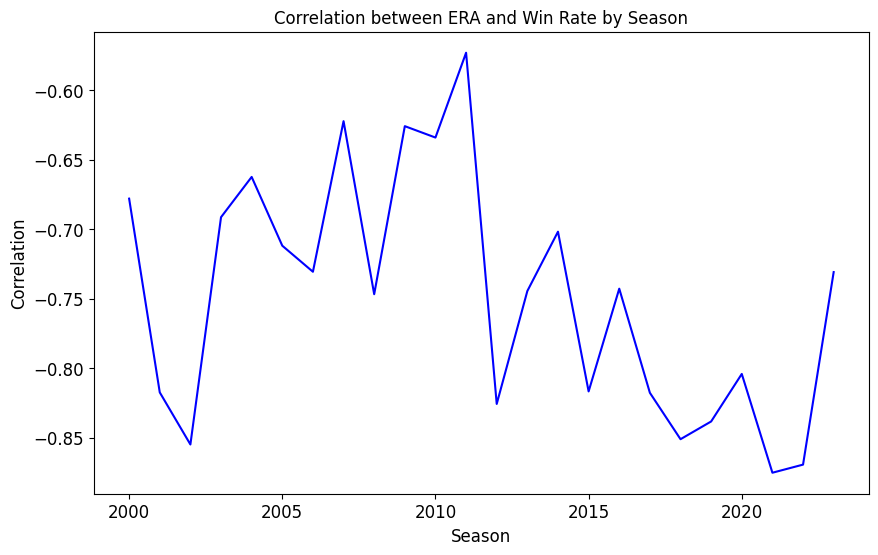

season
2000.0   -0.678027
2001.0   -0.817483
2002.0   -0.854981
2003.0   -0.691391
2004.0   -0.662397
2005.0   -0.711915
2006.0   -0.730658
2007.0   -0.622257
2008.0   -0.746827
2009.0   -0.625863
2010.0   -0.634065
2011.0   -0.573004
2012.0   -0.825816
2013.0   -0.744511
2014.0   -0.701818
2015.0   -0.816786
2016.0   -0.742841
2017.0   -0.817777
2018.0   -0.851180
2019.0   -0.838415
2020.0   -0.804202
2021.0   -0.875307
2022.0   -0.869473
2023.0   -0.730898
dtype: float64


In [6]:
# correlation by season

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# 데이터 로드
data = pd.read_csv('C:\\Users\\co279\\mp_win.csv')

# 시즌별 순위 계산
data['era_rank'] = data.groupby('season')['era'].rank()
data['win_rate_rank'] = data.groupby('season')['win_rate'].rank()

# 시즌별 스피어만 상관계수 계산
correlation_results = data.groupby('season').apply(lambda x: spearmanr(x['win_rate_rank'], x['era_rank'])[0])

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(correlation_results.index, correlation_results.values, linestyle='-', color='b')
plt.title('Correlation between ERA and Win Rate by Season')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
plt.show()

print(correlation_results)

C:\Users\co279\AppData\Local\Temp\ipykernel_2308\122847758.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['era_rank'] = data_clean.groupby('season')['era'].rank(ascending=True)
C:\Users\co279\AppData\Local\Temp\ipykernel_2308\122847758.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['win_rate_rank'] = data_clean.groupby('season')['win_rate'].rank(ascending=False)
C:\Users\co279\AppData\Local\Temp\ipykernel_2308\122847758.py:20: SettingWithCopyWarning: 
A value is trying to b

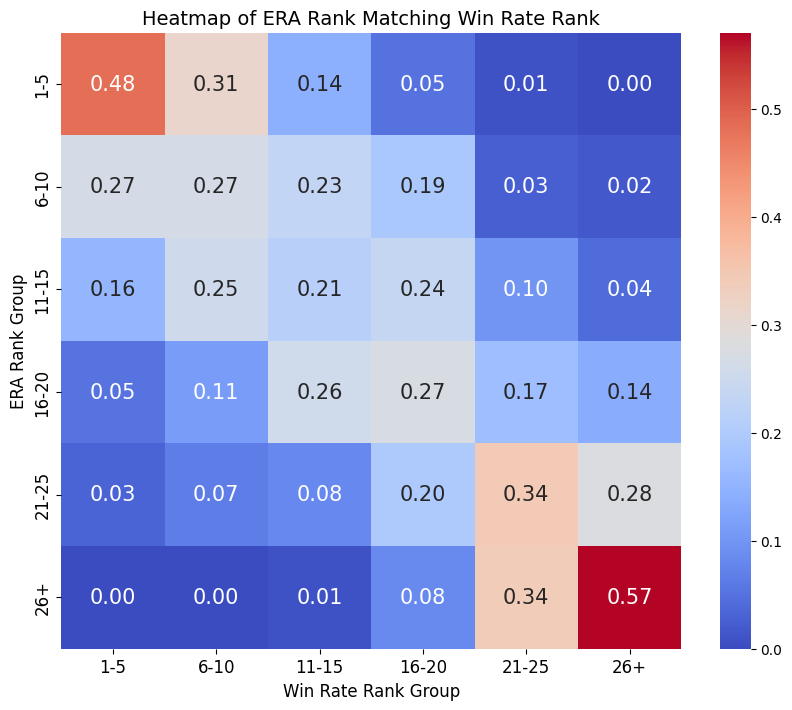

In [7]:
# heatmap by ranking

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드 (가정)
data = pd.read_csv('C:\\Users\\co279\\mp_win.csv')

# 결측치 제거
data_clean = data.dropna(subset=['era', 'win_rate'])

data_clean['era_rank'] = data_clean.groupby('season')['era'].rank(ascending=True)
# win_rate: 높을수록 높은 순위
data_clean['win_rate_rank'] = data_clean.groupby('season')['win_rate'].rank(ascending=False)

# 순위를 6개의 범주로 나누기
bins = [0, 5, 10, 15, 20, 25, data_clean['era_rank'].max()]
labels = ['1-5', '6-10', '11-15', '16-20', '21-25', '26+']
data_clean['era_bin'] = pd.cut(data_clean['era_rank'], bins=bins, labels=labels, include_lowest=True)
data_clean['win_rate_bin'] = pd.cut(data_clean['win_rate_rank'], bins=bins, labels=labels, include_lowest=True)

# 각 그룹에서 동일 그룹에 속할 확률 계산
probability_matrix = pd.DataFrame(index=labels, columns=labels)

for era_group in labels:
    era_subset = data_clean[data_clean['era_bin'] == era_group]
    total_count = len(era_subset)
    
    for win_rate_group in labels:
        match_count = len(era_subset[era_subset['win_rate_bin'] == win_rate_group])
        probability_matrix.loc[era_group, win_rate_group] = match_count / total_count if total_count > 0 else 0

probability_matrix = probability_matrix.astype(float)

# 히트맵 그리기
plt.figure(figsize=(10,8))  # 히트맵 크기 확대
sns.heatmap(probability_matrix, cmap="coolwarm", annot=True, fmt=".2f", annot_kws={"size": 15})  # 텍스트 크기 조정
plt.title('Heatmap of ERA Rank Matching Win Rate Rank', fontsize=14)
plt.xlabel('Win Rate Rank Group', fontsize=12)
plt.ylabel('ERA Rank Group', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [4]:
print(probability_matrix)

            1-5      6-10     11-15     16-20     21-25       26+
1-5    0.483051  0.313559  0.144068  0.050847  0.008475       0.0
6-10   0.266667  0.266667  0.233333  0.191667     0.025  0.016667
11-15  0.155738  0.254098  0.213115  0.237705  0.098361  0.040984
16-20  0.051282  0.111111   0.25641  0.273504   0.17094  0.136752
21-25  0.032787  0.065574  0.081967  0.196721  0.344262  0.278689
26+         0.0       0.0  0.008264  0.082645  0.338843  0.570248
